In [2]:
%reload_ext autoreload
%autoreload 2

## Import packages

In [3]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from ripple_heterogeneity.replay import (
    replay_run,
    replay_participation_all_replays,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pickle
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import logging
from statannotations.Annotator import Annotator

logging.basicConfig(level=logging.INFO)


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## default plotting

In [4]:
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

## Load replay data

In [5]:
# save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_v7"
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_82422'
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_82622"

replay_df = replay_run.load_results(save_path, pre_task_post=False)


## run replay participation analysis

replay_participation_all_replays

In [9]:
# replay_participation_all_replays.handle_epochs(
#     "Z:\Data\GrosmarkAD\Achilles\Achilles_10252013",
#     ["sleep", "linear", "sleep"],
#     ["linear", "sleep"],
#     ["sleep", "linear"],
# )


(<EpochArray at 0x16aa1e0dd00: 2 epochs> of length 9:41:01:103 hours,
 array(['sleep', 'linear_sleep'], dtype=object))

In [10]:
# temp_df = replay_participation_all_replays.run("Z:\Data\GrosmarkAD\Achilles\Achilles_10252013",
#     replay_df=replay_df,
#     replay_save_path=save_path,
#     environments=["sleep", "linear", "sleep"],
#     min_env_criteria = ["sleep", "linear"],
#     epochs_to_combine=["linear", "sleep"])

# get many types of participation and firing

* combine linear and following sleep sessions to calc participation

* if no post sleep, only calc on linear track

* capture pre sleep participation



In [6]:
# save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_v7"
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay'
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\replay_82422'
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_82622"

# save_path_cur_analysis = (
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_v7_sessions_task_post"
# )
# save_path_cur_analysis = (
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_all_sessions_sleep_task_sleep"
# )
save_path_cur_analysis = (
    r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_all_sessions_sleep_task_sleep_v3"
)
batch_analysis.run(
    replay_df,
    save_path_cur_analysis,
    replay_participation_all_replays.run,
    parallel=True,
    verbose=True,
    overwrite=False,
    skip_if_error=False,
    replay_df=replay_df,
    replay_save_path=save_path,
    environments=["sleep", "linear", "sleep"],
    min_env_criteria = ["sleep", "linear"],
    epochs_to_combine=["linear", "sleep"],
    alpha=0.05,
    min_spk_count=0,
)

# read back in
# save_path_cur_analysis = (
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_v7_sessions_task_post"
# )
sessions = glob.glob(save_path_cur_analysis + os.sep + "*.pkl")
par_df = pd.DataFrame()
for session in sessions:
    with open(session, "rb") as f:
        results = pickle.load(f)
    par_df = pd.concat([par_df, results])


100%|██████████| 91/91 [00:06<00:00, 14.65it/s] 


## add deep sup class from deep sup distance

In [7]:
par_df

,avg_fr,non_ripple_avg_fr,replay_fr,ripple_fr,non_replay_fr,replay_par,ripple_par,non_replay_par,forward_replay_par,reverse_replay_par,epoch,epoch_i,UID,deepSuperficialDistance,n_replays,n_forward_replays,n_reverse_replays,n_ripples,basepath
0,0.303509,0.230796,1.851852,1.348632,1.984877,0.333333,0.166102,0.278689,NaN,0.333333,sleep,0,9,-28.457275,3,0,3,590,Z:\Data\AYAold\AB1\day1
1,0.277193,0.264284,1.851852,0.620799,0.378072,0.333333,0.083051,0.065574,NaN,0.333333,sleep,0,10,121.542725,3,0,3,590,Z:\Data\AYAold\AB1\day1
2,10.793867,9.884389,29.629630,23.590358,28.071834,1.000000,0.825424,0.934426,NaN,1.000000,sleep,0,12,-28.457275,3,0,3,590,Z:\Data\AYAold\AB1\day1
3,0.637720,0.558435,12.962963,2.076465,1.606805,1.000000,0.227119,0.229508,NaN,1.000000,sleep,0,15,71.542725,3,0,3,590,Z:\Data\AYAold\AB1\day1
4,1.067545,0.903271,9.259259,3.521428,5.293006,0.333333,0.313559,0.442623,NaN,0.333333,sleep,0,17,21.542725,3,0,3,590,Z:\Data\AYAold\AB1\day1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,0.734988,0.656775,7.731959,2.184801,5.535586,0.545455,0.209695,0.465201,1.0,0.500000,linear_sleep,1,72,20.000000,11,1,10,4621,Z:\Data\Kenji\ec016.267_278
48,1.166168,1.134161,4.639175,1.599561,2.516175,0.454545,0.160571,0.311355,0.0,0.500000,linear_sleep,1,77,-44.542208,11,1,10,4621,Z:\Data\Kenji\ec016.267_278
49,0.885240,0.841100,1.546392,1.752905,3.235083,0.181818,0.175287,0.315018,0.0,0.200000,linear_sleep,1,78,-44.542208,11,1,10,4621,Z:\Data\Kenji\ec016.267_278
50,1.442503,1.273988,13.402062,4.809938,8.159597,0.909091,0.381519,0.589744,1.0,0.900000,linear_sleep,1,79,-64.542208,11,1,10,4621,Z:\Data\Kenji\ec016.267_278


In [8]:
# par_df = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(par_df)
par_df = add_new_deep_sup.add_new_deep_sup_class(par_df)
for basepath in par_df.basepath.unique():
    par_df.loc[par_df.basepath == basepath, "animal_id"] = loading.get_animal_id(basepath)


## plot replay partic prob. between layers

In [10]:
# par_df[keep_idx].basepath.value_counts()

In [9]:
par_df.loc[par_df.epoch.str.contains("linear"),"epoch"] = "linear_sleep"

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

linear_sleep_Deep vs. linear_sleep_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:2.707e-02 U_stat=4.595e+04


(<AxesSubplot:xlabel='epoch', ylabel='replay participation prob.'>,
 [<statannotations.Annotation.Annotation at 0x204265e8be0>])

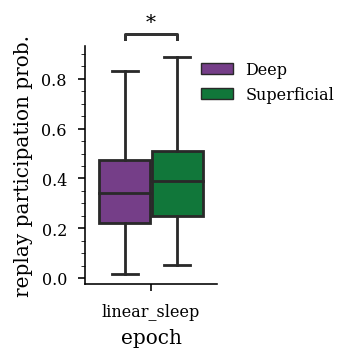

In [10]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

# keep_idx = (par_df.n_replays > 30) & (~par_df.basepath.str.contains('GirardeauG'))
# keep_idx = (par_df.n_replays > 30) & (par_df.epoch.str.contains("linear"))
# keep_idx = (par_df.n_replays > 20) & (
#     par_df.epoch.str.contains("linear_sleep")
#     & (~par_df.basepath.str.contains("GirardeauG"))
# )
keep_idx = (
    (par_df.n_replays > 40) 
    & (par_df.epoch.str.contains("linear_sleep"))
    & (~par_df.basepath.str.contains("GirardeauG"))
    )

sns.boxplot(
    x="epoch",
    y="replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
# sns.stripplot(
#     x="epoch",
#     y="replay_par",
#     hue="deepSuperficial",
#     hue_order=group_colors.keys(),
#     data=par_df[keep_idx],
#     dodge=True,
#     color="k",
#     size=3,
#     alpha=0.25,
#     jitter=0.2,
# )

plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.axes.get_xaxis().set_ticks([])
# ax.spines["bottom"].set_visible(False)
# ax.get_legend().remove()
# ax.set_xlabel("")
ax.set_ylabel("replay participation prob.")

box_pairs = [
    (("linear_sleep", "Deep"), ("linear_sleep", "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=par_df[keep_idx],
    x="epoch",
    y="replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
#  t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene, Wilcoxon, Kruskal
annotator.apply_and_annotate()
# ax.set_ylim(-0.01,1)
# plt.savefig(
#     os.path.join(fig_save_path, "replay_participation_08_26_22.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )


In [10]:
test_df = par_df[keep_idx].groupby(["basepath","deepSuperficial"]).apply(lambda x: x.replay_fr.mean()).reset_index().sort_values(0)
test_df

,basepath,deepSuperficial,0
36,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,middle,0.458015
35,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013,Superficial,1.824427
33,Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013,middle,1.827617
22,Z:\Data\GrosmarkAD\Achilles\Achilles_11012013,Superficial,1.962617
21,Z:\Data\GrosmarkAD\Achilles\Achilles_11012013,Deep,2.469960
39,Z:\Data\HMC1\day10,middle,2.574158
19,Z:\Data\GrosmarkAD\Achilles\Achilles_10252013,Superficial,2.601881
23,Z:\Data\GrosmarkAD\Achilles\Achilles_11012013,middle,2.611904
27,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,Deep,2.643224
37,Z:\Data\HMC1\day10,Deep,2.656109


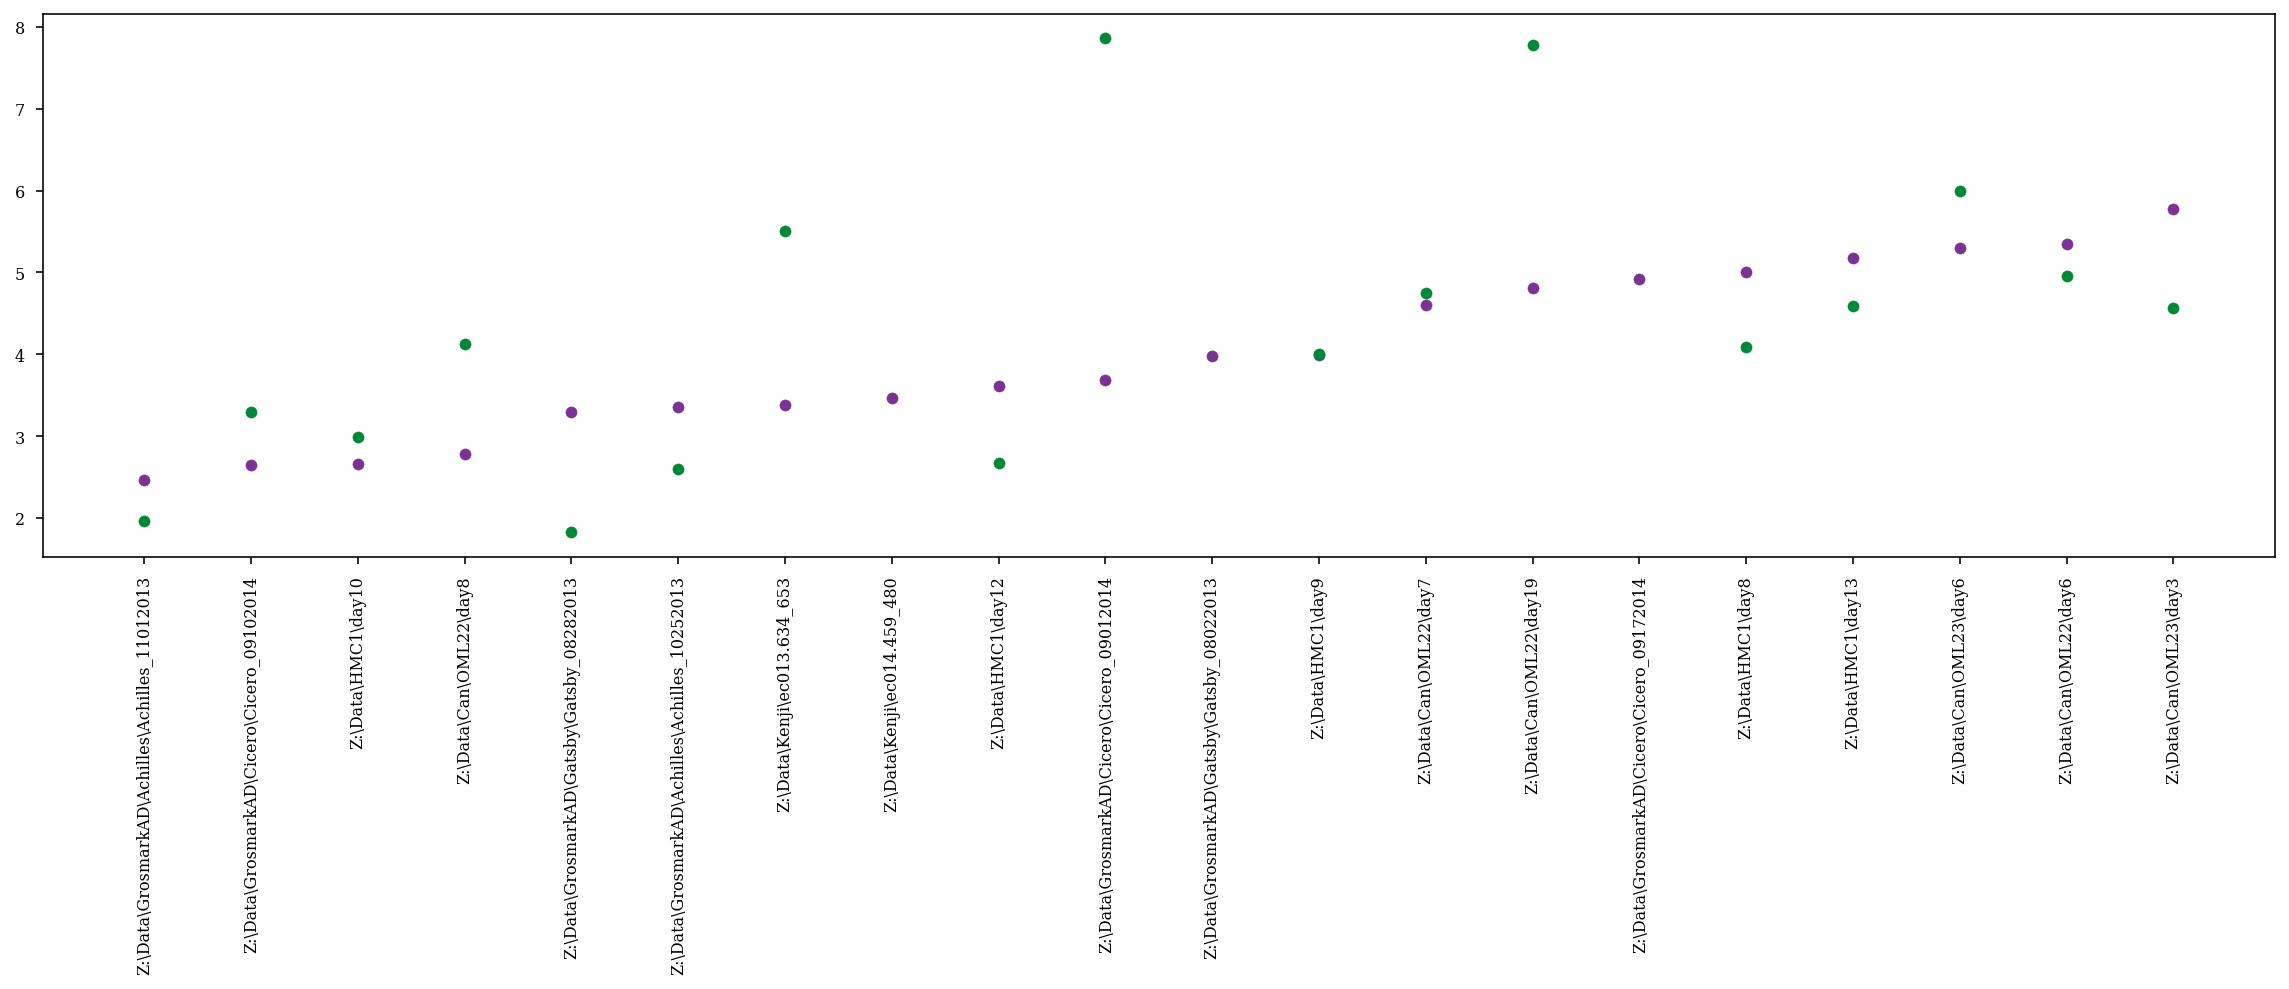

In [14]:
plt.figure(figsize=(20,5))

plt.scatter(test_df.query("deepSuperficial=='Deep'").basepath,test_df.query("deepSuperficial=='Deep'")[0])
plt.scatter(test_df.query("deepSuperficial=='Superficial'").basepath,test_df.query("deepSuperficial=='Superficial'")[0])

plt.xticks(rotation=90)
plt.show()

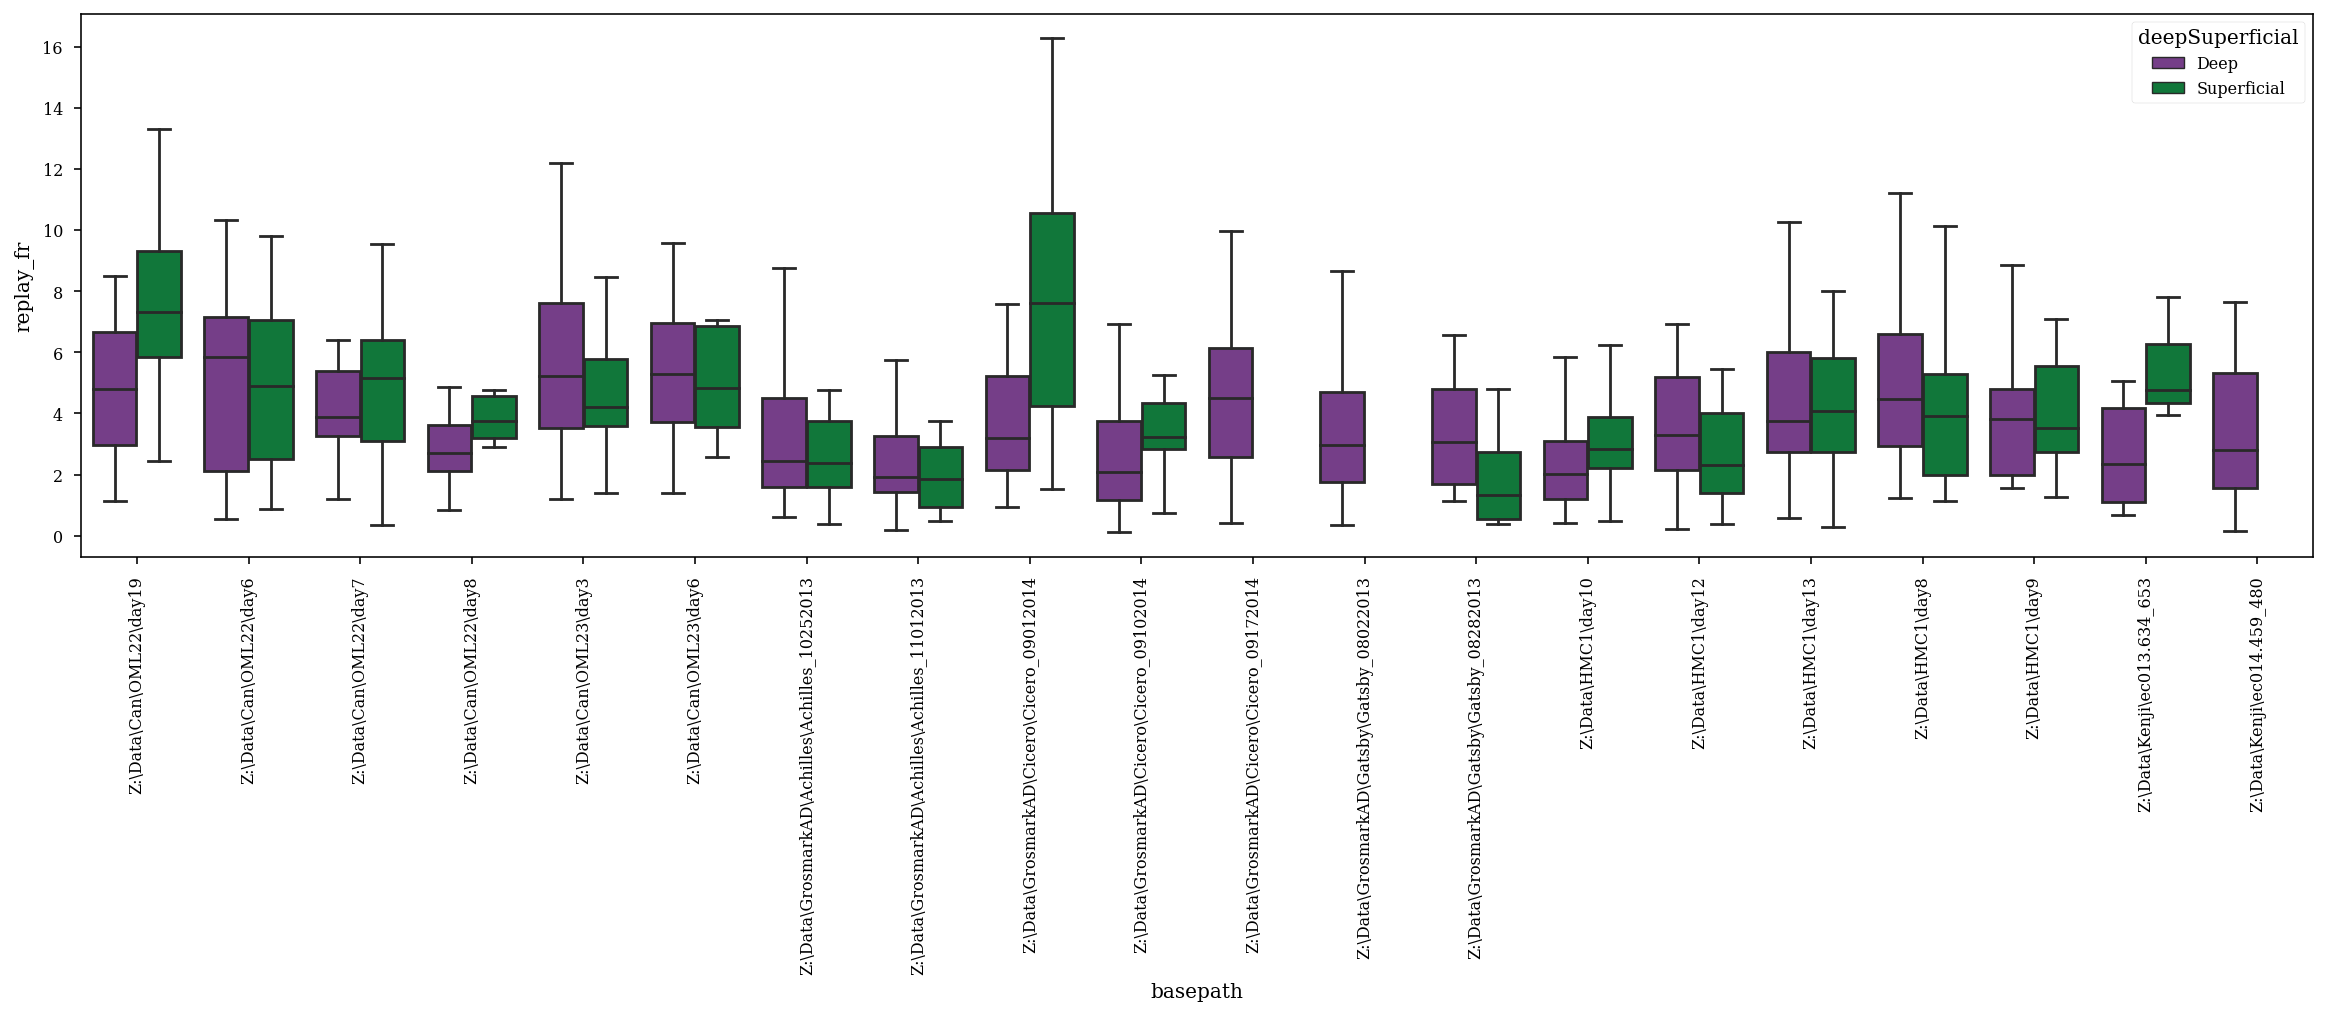

In [15]:
plt.figure(figsize=(20,5))
sns.boxplot(
    x="basepath",
    y="replay_fr",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
plt.xticks(rotation=90)
plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

linear_sleep_Deep vs. linear_sleep_Superficial: Mann-Whitney-Wilcoxon test two-sided, P_val:4.225e-02 U_stat=5.870e+04


(<AxesSubplot:ylabel='replay FR'>,
 [<statannotations.Annotation.Annotation at 0x20422a1bdc0>])

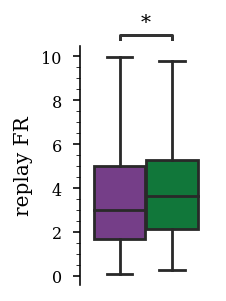

In [11]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
# keep_idx = (par_df.n_replays > 50) & (
#     par_df.epoch.str.contains("linear_sleep")
#     & (~par_df.basepath.str.contains("GirardeauG"))
# )
keep_idx = (
    (par_df.n_replays > 50) 
    & par_df.epoch.str.contains("linear_sleep")
)
par_df["replay_fr_log"] = np.log(par_df.replay_fr)
sns.boxplot(
    x="epoch",
    y="replay_fr",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
ax.set_xlabel("")
ax.set_ylabel("replay FR")

box_pairs = [
    (("linear_sleep", "Deep"), ("linear_sleep", "Superficial")),
]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=par_df[keep_idx],
    x="epoch",
    y="replay_fr",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
)

annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

# plt.savefig(
#     os.path.join(fig_save_path, "replay_fr_08_26_22.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )


## See replay firing rate gain

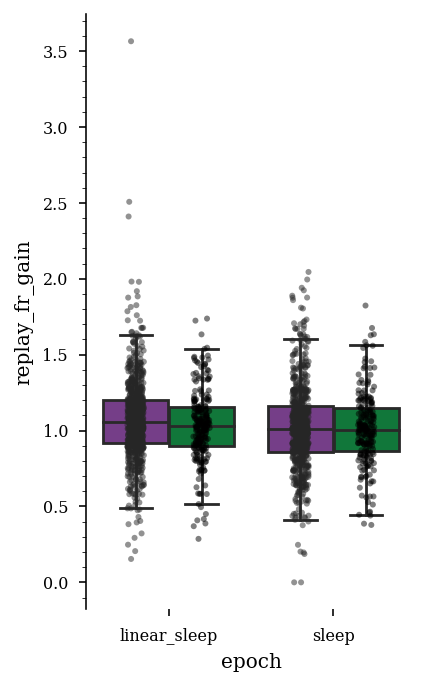

In [12]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.5, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

par_df["replay_fr_gain"] = par_df["replay_fr"] / par_df["non_replay_fr"]

# keep_idx = (par_df.n_replays > 30) & (~par_df.basepath.str.contains('GirardeauG'))
keep_idx = (par_df.n_replays > 30)

sns.boxplot(
    x="epoch",
    y="replay_fr_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
sns.stripplot(
    x="epoch",
    y="replay_fr_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
# ax.set_xlabel("")
# ax.set_ylabel("non_replay_fr firing rate (Hz)")

# ax.set_yscale("log")
# plt.savefig(
#     os.path.join(fig_save_path, "replay_fr_05_11_22.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )
# par_df[keep_idx].basepath.unique()

## Test python mixed lm model

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder

temp_df = par_df[(par_df.deepSuperficial != "middle") & (par_df.n_replays > 30)]

lbl=LabelEncoder()
temp_df['basepath_encoded'] = lbl.fit_transform(temp_df[['basepath']])
temp_df['deepSuperficial_encoded'] = lbl.fit_transform(temp_df[['deepSuperficial']])

temp_df["Intercept"] = 1
exog = temp_df[["Intercept", "deepSuperficial_encoded"]]
md = sm.MixedLM(temp_df["replay_par"], exog, groups=temp_df["basepath_encoded"], exog_re=exog["Intercept"])
mdf = md.fit()
print(mdf.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    replay_par
No. Observations:    1902       Method:                REML      
No. Groups:          34         Scale:                 0.0324    
Min. group size:     6          Log-Likelihood:        508.8700  
Max. group size:     150        Converged:             Yes       
Mean group size:     55.9                                        
-----------------------------------------------------------------
                        Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------
Intercept               0.406    0.019 21.205 0.000  0.368  0.443
deepSuperficial_encoded 0.005    0.011  0.455 0.649 -0.016  0.026
Intercept Var           0.011    0.018                           



## Forward / Reverse 

make wide to long df

In [13]:
keep_idx = (par_df.n_replays > 30) & (par_df.epoch.str.contains("linear"))

par_df_long = pd.melt(
    par_df[keep_idx],
    id_vars=["basepath", "UID", "deepSuperficial"],
    value_vars=["forward_replay_par", "reverse_replay_par"],
    var_name="replay_type",
    value_name="replay_participation",
)
par_df_long


,basepath,UID,deepSuperficial,replay_type,replay_participation
0,Z:\Data\AYAold\AYA6\day17,25,Superficial,forward_replay_par,0.312500
1,Z:\Data\AYAold\AYA6\day17,27,Deep,forward_replay_par,0.187500
2,Z:\Data\AYAold\AYA6\day17,29,Superficial,forward_replay_par,0.187500
3,Z:\Data\AYAold\AYA6\day17,30,Superficial,forward_replay_par,0.375000
4,Z:\Data\AYAold\AYA6\day17,31,Superficial,forward_replay_par,0.000000
...,...,...,...,...,...
2701,Z:\Data\Kenji\ec014.459_480,75,Deep,reverse_replay_par,0.515625
2702,Z:\Data\Kenji\ec014.459_480,76,Deep,reverse_replay_par,0.484375
2703,Z:\Data\Kenji\ec014.459_480,77,Deep,reverse_replay_par,0.171875
2704,Z:\Data\Kenji\ec014.459_480,82,Deep,reverse_replay_par,0.468750


In [23]:
par_df_long.basepath.nunique()

33

### look at forward and reverse

[Text(0, 0, 'forward'), Text(1, 0, 'reverse')]

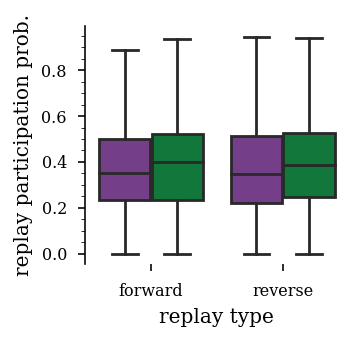

In [14]:
# fig = plt.figure(
#     figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
# )
w,h = functions.set_size("thesis", fraction=0.2, subplots=(3, 1))

fig = plt.figure(
    figsize=(w*2,h), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

g=sns.boxplot(
    x="replay_type",
    y="replay_participation",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df_long,
    showfliers=False,
)
ax = plt.gca()
ax.get_legend().remove()
sns.despine()
ax.yaxis.set_minor_locator(AutoMinorLocator())
# ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
# ax.get_legend().remove()
# ax.set_xlabel("")
# plt.xticks(['forward','reverse'], rotation='vertical')
ax.set_ylabel("replay participation prob.")
ax.set_xlabel("replay type")
g.set_xticklabels(['forward','reverse'])

# ax.set_ylim(0,1)

# plt.savefig(
#     os.path.join(fig_save_path, "replay_participation_for_rev.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

In [15]:
par_df_long['replay_type_ca1_layer'] = par_df_long['replay_type'] + '_' + par_df_long['deepSuperficial']
par_df_long['replay_type_ca1_layer'].unique()

array(['forward_replay_par_Superficial', 'forward_replay_par_Deep',
       'forward_replay_par_middle', nan, 'reverse_replay_par_Superficial',
       'reverse_replay_par_Deep', 'reverse_replay_par_middle'],
      dtype=object)

### paired plot of forward and reverse

<AxesSubplot:xlabel='replay_type', ylabel='replay_participation'>

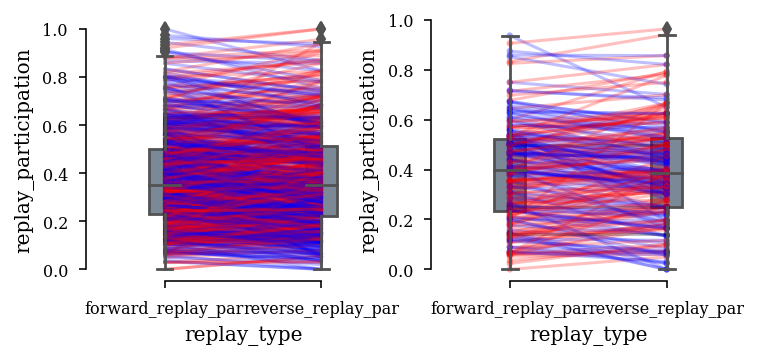

In [16]:
import pingouin as pg

fig, axs = plt.subplots(1, 2, figsize=functions.set_size(
    'thesis', fraction=1, subplots=(2, 3)), edgecolor='k')
fig.subplots_adjust(hspace=.2, wspace=.1)
axs = axs.ravel()

ax = plt.gca()
par_df_long["basepath_UID"] = par_df_long.basepath + "_" + par_df_long.UID.astype(str)

pg.plot_paired(
    data=par_df_long[par_df_long.deepSuperficial == "Deep"],
    dv="replay_participation",
    within="replay_type",
    subject="basepath_UID",
    ax=axs[0],
    pointplot_kwargs={"alpha": 0.25, "s": .5},colors=['r','k','b'],
)
pg.plot_paired(
    data=par_df_long[par_df_long.deepSuperficial == "Superficial"],
    dv="replay_participation",
    within="replay_type",
    subject="basepath_UID",
    ax=axs[1],
    pointplot_kwargs={"alpha": 0.25},colors=['r','k','b']
)

In [17]:
# par_df["forward_reverse_ratio"] = (
#     par_df.forward_replay_par - par_df.reverse_replay_par
# ) / (par_df.forward_replay_par + par_df.reverse_replay_par)

# par_df["forward_reverse_ratio"] = (
#     par_df.forward_replay_par - par_df.reverse_replay_par
# )

par_df["forward_reverse_ratio"] = (
    par_df.forward_replay_par / par_df.reverse_replay_par
)

In [18]:
(par_df[par_df.deepSuperficial == "Deep"].forward_reverse_ratio > 1).sum()
(par_df[par_df.deepSuperficial == "Deep"].forward_reverse_ratio < 1).sum()

(par_df[par_df.deepSuperficial == "Superficial"].forward_reverse_ratio > 1).sum(),(par_df[par_df.deepSuperficial == "Superficial"].forward_reverse_ratio < 1).sum()

(361, 308)

### Forward / Reverse for main fig

Text(0, 0.5, 'Replay participation prob. \n Forward/reverse')

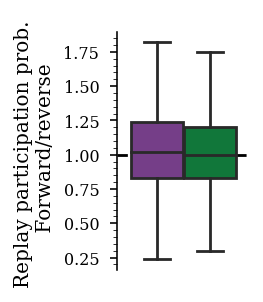

In [19]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)
group_colors = {"Deep": "#7b3294", "Superficial": "#008837"}
sns.set_palette(sns.color_palette(group_colors.values()))

sns.boxplot(
    x="epoch",
    y="forward_reverse_ratio",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
    # boxprops=dict(alpha=.7)

# sns.stripplot(
#     x="epoch",
#     y="forward_reverse_ratio",
#     hue="deepSuperficial",
#     hue_order=group_colors.keys(),
#     data=par_df[keep_idx],
#     dodge=True,
#     color="k",
#     size=3,
#     alpha=0.5,
# )
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
ax.set_xlabel("")
ax.axhline(1, linestyle="--", color="k",zorder=-1000)

ax.set_ylabel("Replay participation prob. \n Forward/reverse")

# plt.savefig(
#     os.path.join(fig_save_path, "replay_participation_replay_type.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

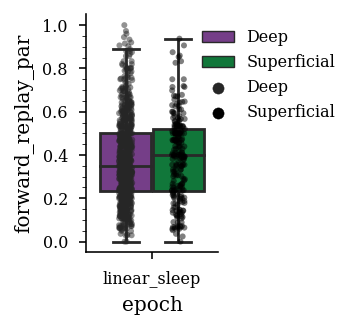

In [20]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

sns.boxplot(
    x="epoch",
    y="forward_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
sns.stripplot(
    x="epoch",
    y="forward_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
# plt.yscale("log")

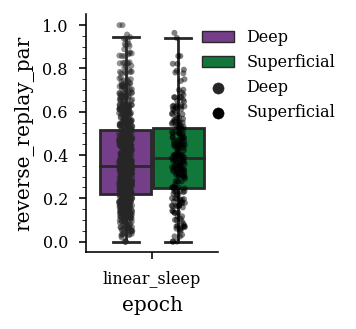

In [21]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

sns.boxplot(
    x="epoch",
    y="reverse_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
sns.stripplot(
    x="epoch",
    y="reverse_replay_par",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
# plt.yscale("log")

## calculate firing rate gain

$replayGain = \frac{replay fr}{avg fr}$

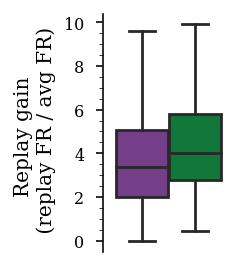

In [108]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

# par_df["replay_df_gain_avg_to_replay"] = (par_df.replay_fr-par_df.non_ripple_avg_fr)/(par_df.replay_fr+par_df.non_ripple_avg_fr)
par_df["replay_df_gain_avg_to_replay"] = par_df.replay_fr / par_df.non_ripple_avg_fr

keep_idx = (
    (par_df.n_replays > 30)
    & (par_df.animal_id != "Rat08")
    & (par_df.animal_id != "Gatsby")
    & (par_df.animal_id != "OML22")
    & (par_df.epoch.str.contains("linear"))
)

sns.boxplot(
    x="epoch",
    y="replay_df_gain_avg_to_replay",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)

# sns.stripplot(
#     x="epoch",
#     y="replay_df_gain_avg_to_replay",
#     hue="deepSuperficial",
#     hue_order=group_colors.keys(),
#     data=par_df[keep_idx],
#     dodge=True,
#     color="k",
#     size=3,
#     alpha=0.5,
# )
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)

sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
ax.set_xlabel("")
# ax.axhline(1, linestyle="--", color="k",zorder=-1000)
ax.set_ylabel("Replay gain \n (replay FR / avg FR)")

plt.savefig(
    os.path.join(fig_save_path, "replay_fr_over_avg_fr.svg"),
    dpi=300,
    bbox_inches="tight",
)

<AxesSubplot:xlabel='animal_id', ylabel='replay_df_gain_avg_to_replay'>

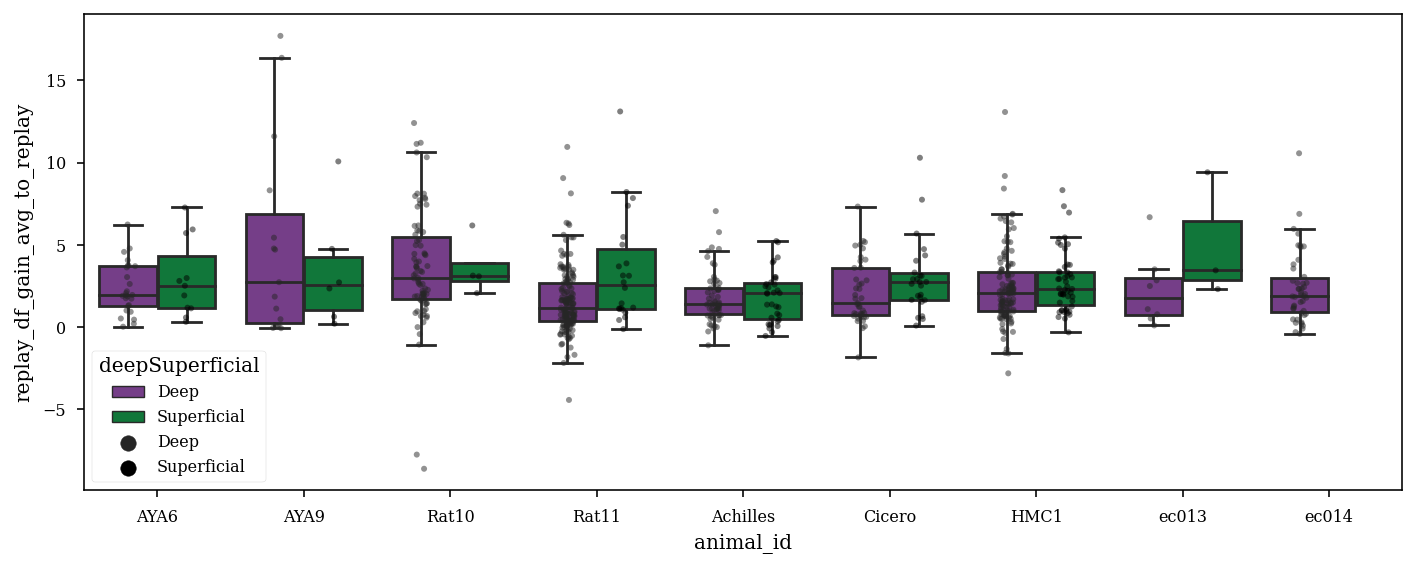

In [109]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=2, subplots=(3, 5)), edgecolor=None
)
par_df["replay_df_gain_avg_to_replay"] = (par_df.replay_fr-par_df.non_ripple_avg_fr)

sns.boxplot(
    x="animal_id",
    y="replay_df_gain_avg_to_replay",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)
sns.stripplot(
    x="animal_id",
    y="replay_df_gain_avg_to_replay",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)

In [58]:
par_df.epoch.unique()

array(['sleep', 'linear', 'linear_sleep'], dtype=object)

In [59]:
for animal_id in par_df[keep_idx].animal_id.unique():
    print(animal_id, ' deep ', sum((par_df[keep_idx].animal_id == animal_id) & (par_df[keep_idx].deepSuperficial == "Deep")))
    print(animal_id, ' sup ', sum((par_df[keep_idx].animal_id == animal_id) & (par_df[keep_idx].deepSuperficial == "Superficial")))


AYA6  deep  26
AYA6  sup  11
AYA9  deep  15
AYA9  sup  6
OML22  deep  68
OML22  sup  25
Rat10  deep  79
Rat10  sup  4
Rat11  deep  158
Rat11  sup  22
Achilles  deep  59
Achilles  sup  34
Cicero  deep  41
Cicero  sup  25
HMC1  deep  119
HMC1  sup  50
ec013  deep  8
ec013  sup  3
ec014  deep  46
ec014  sup  0


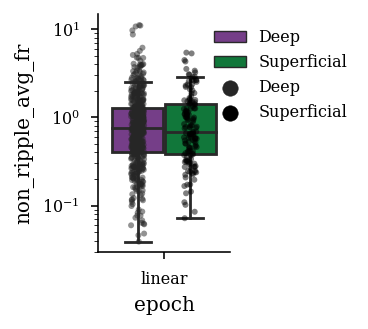

In [115]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.2, subplots=(3, 1)), edgecolor=None
)

sns.boxplot(
    x="epoch",
    y="non_ripple_avg_fr",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    showfliers=False,
)

sns.stripplot(
    x="epoch",
    y="non_ripple_avg_fr",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)
sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.yscale("log")

## Ripple gain pre-sleep norm

$replayGain = \frac{ReplayFr}{preSleepAvgFr}$


In [18]:
# par_df_wide = pd.pivot(
#     par_df[keep_idx], index=["UID","basepath","deepSuperficial"], columns="epoch", values=["replay_fr","avg_fr"]
# ).reset_index()
# par_df_wide

# par_df_wide["replay_gain"] = par_df_wide["replay_fr"]["linear_sleep"] / par_df_wide["avg_fr"]["sleep"]
# # par_df_wide["avg_fr"]["sleep"]
# par_df_wide

In [19]:
# par_df_wide[par_df_wide.basepath == "Z:\Data\GrosmarkAD\Achilles\Achilles_10252013"]
# par_df[par_df.basepath == "Z:\Data\GrosmarkAD\Achilles\Achilles_10252013"].epoch.value_counts()

# par_df

In [104]:
par_df[keep_idx].basepath.unique()

array(['Z:\\Data\\AYAold\\AYA6\\day17', 'Z:\\Data\\AYAold\\AYA9\\day17',
       'Z:\\Data\\Can\\OML22\\day19', 'Z:\\Data\\Can\\OML22\\day6',
       'Z:\\Data\\Can\\OML22\\day7', 'Z:\\Data\\Can\\OML22\\day8',
       'Z:\\Data\\GirardeauG\\Rat08\\Rat08-20130717',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140619',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140622',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140624',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140627',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140703',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140704',
       'Z:\\Data\\GirardeauG\\Rat10\\Rat10-20140705',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150310',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150315',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150316',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150326',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150327',
       'Z:\\Data\\GirardeauG\\Rat11\\Rat11-20150328',
       'Z:\\Data\\GirardeauG\\Rat11\

In [125]:
par_df[par_df.basepath == "Z:\\Data\\Can\\OML22\\day8"].n_replays

0     29
1     29
2     29
3     29
4     29
      ..
83    47
84    47
85    47
86    47
87    47
Name: n_replays, Length: 88, dtype: int32

In [126]:
keep_idx = par_df.n_replays > 28

par_df_wide = pd.pivot(
    par_df[keep_idx],
    index=["UID", "basepath", "deepSuperficial"],
    columns="epoch",
    values=["replay_fr", "avg_fr"],
).reset_index()

par_df_wide["replay_gain"] = par_df_wide["replay_fr"]["linear_sleep"] / par_df_wide["avg_fr"]["sleep"]
# par_df_wide["replay_gain"] = (
#     par_df_wide["replay_fr"]["linear_sleep"] - par_df_wide["avg_fr"]["sleep"]
# ) / (par_df_wide["replay_fr"]["linear_sleep"] + par_df_wide["avg_fr"]["sleep"])

par_df_wide["constant"] = 1

for basepath in par_df_wide.basepath.unique():
    par_df_wide.loc[
        par_df_wide.basepath == basepath, "animal_id"
    ] = loading.get_animal_id(basepath)
par_df_wide = par_df_wide[
    ["UID", "basepath", "deepSuperficial", "animal_id", "replay_gain", "constant"]
]
par_df_wide = par_df_wide[~np.isnan(par_df_wide.replay_gain)]
par_df_wide


,UID,basepath,deepSuperficial,animal_id,replay_gain,constant
epoch,,,,,,
2,1,Z:\Data\Can\OML22\day8,Superficial,OML22,3.444390,1
3,1,Z:\Data\GrosmarkAD\Achilles\Achilles_11012013,Deep,Achilles,4.485374,1
4,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09102014,Deep,Cicero,2.840216,1
5,1,Z:\Data\GrosmarkAD\Cicero\Cicero_09172014,Deep,Cicero,5.596996,1
7,1,Z:\Data\Kenji\ec014.459_480,Deep,ec014,16.773367,1
...,...,...,...,...,...,...
1260,304,Z:\Data\HMC1\day9,middle,HMC1,4.851994,1
1261,305,Z:\Data\HMC1\day9,Deep,HMC1,1.781830,1
1262,308,Z:\Data\HMC1\day9,middle,HMC1,2.882403,1


In [127]:
# describe par_df_wide
par_df_wide.describe()
print(par_df_wide.basepath.value_counts())
print(par_df_wide.deepSuperficial.value_counts())


Z:\Data\GrosmarkAD\Achilles\Achilles_10252013    104
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013     90
Z:\Data\HMC1\day10                                78
Z:\Data\HMC1\day9                                 58
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014         55
Z:\Data\GirardeauG\Rat11\Rat11-20150331           52
Z:\Data\Kenji\ec014.459_480                       49
Z:\Data\Can\OML22\day8                            44
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014         42
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013         36
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014         34
Z:\Data\GirardeauG\Rat11\Rat11-20150327           31
Z:\Data\GirardeauG\Rat11\Rat11-20150330           30
Z:\Data\GirardeauG\Rat11\Rat11-20150310           28
Z:\Data\GirardeauG\Rat10\Rat10-20140619           27
Z:\Data\GirardeauG\Rat11\Rat11-20150328           26
Z:\Data\GirardeauG\Rat10\Rat10-20140622           21
Z:\Data\GirardeauG\Rat10\Rat10-20140624           18
Z:\Data\GirardeauG\Rat11\Rat11-20150315       

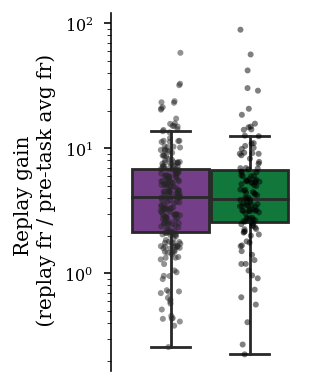

In [146]:

fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=0.3, subplots=(3, 1)), edgecolor=None
)

# keep_idx = (
#     (par_df_wide.animal_id != "Gatsby")
#     & (par_df_wide.animal_id != "ec014")
#     & (par_df_wide.animal_id != "achilles")
#     & (par_df_wide.animal_id != "Rat11")
# )
par_df_wide["consider_remove"] = False
for basepath in par_df_wide.basepath.unique():
    deep_idx = np.sum(par_df_wide[par_df_wide.basepath == basepath].deepSuperficial == "Deep") > 0
    sup_idx = np.sum(par_df_wide[par_df_wide.basepath == basepath].deepSuperficial == "Superficial") > 0
    if not deep_idx or not sup_idx:
        par_df_wide.loc[par_df_wide.basepath == basepath,"consider_remove"] = True

keep_idx = par_df_wide.consider_remove == False

sns.boxplot(
    x="constant",
    y="replay_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df_wide[keep_idx],
    showfliers=False,
)

sns.stripplot(
    x="constant",
    y="replay_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df_wide[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=0.5,
)
plt.legend(
    bbox_to_anchor=(2, 1),
    loc="upper right",
    fancybox=False,
    shadow=False,
    ncol=1,
    frameon=False,
)

sns.despine()
ax = plt.gca()
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.axes.get_xaxis().set_ticks([])
ax.spines["bottom"].set_visible(False)
ax.get_legend().remove()
ax.set_xlabel("")
# ax.axhline(1, linestyle="--", color="k",zorder=-1000)

ax.set_ylabel("Replay gain \n (replay fr / pre-task avg fr)")
plt.yscale("log")

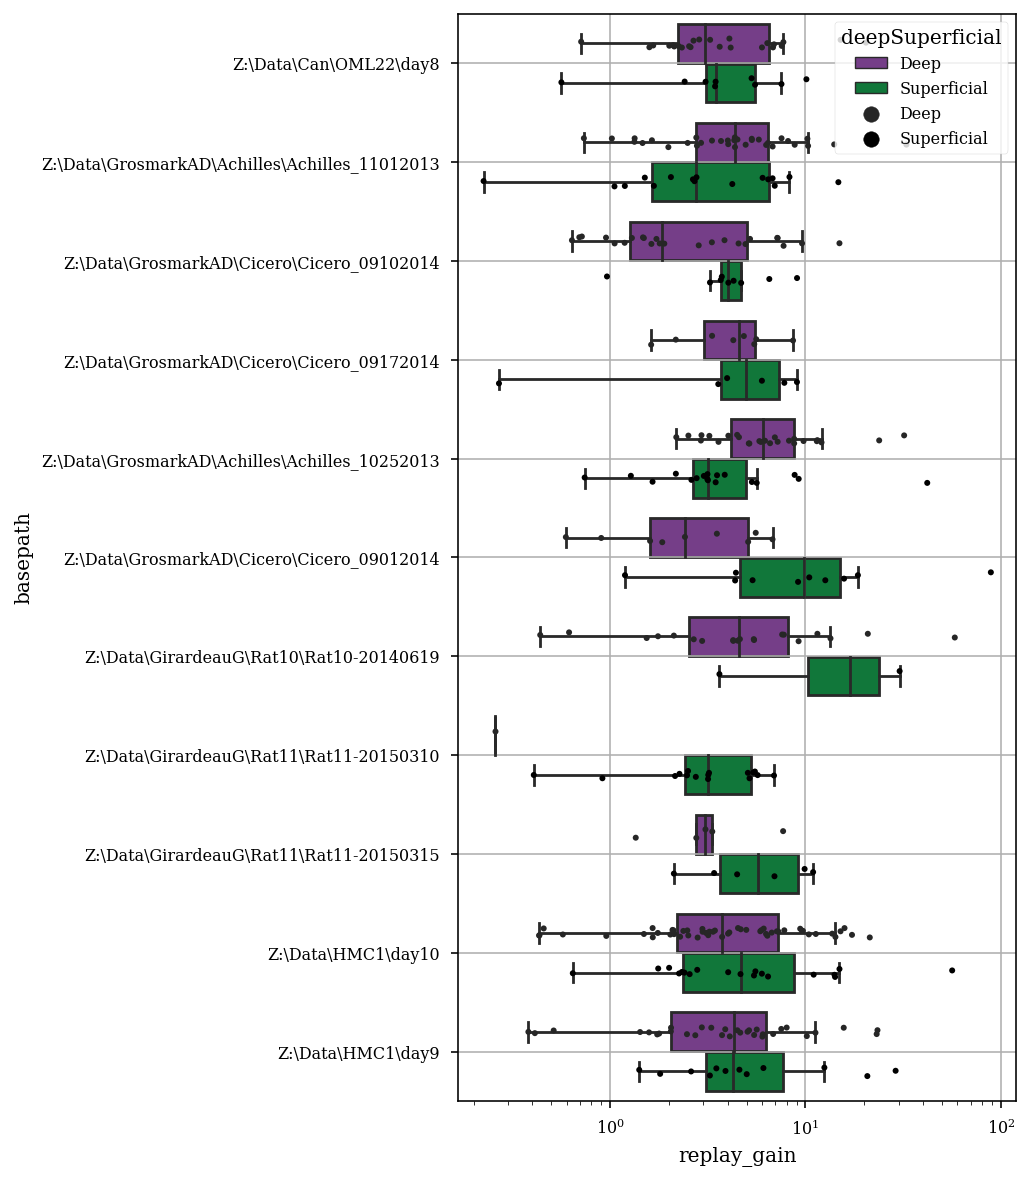

In [147]:
plt.figure(figsize=(5,10))
sns.boxplot(
    y="basepath",
    x="replay_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df_wide[keep_idx],
    showfliers=False,
)
sns.stripplot(
    y="basepath",
    x="replay_gain",
    hue="deepSuperficial",
    hue_order=group_colors.keys(),
    data=par_df_wide[keep_idx],
    dodge=True,
    color="k",
    size=3,
    alpha=1,
)
plt.xscale("log")
plt.grid()

In [148]:
par_df_wide.to_csv(
    r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_all_sessions_task_post_replay_gain.csv"
)

In [32]:
par_df.epoch.unique()

array(['sleep', 'linear', 'linear_sleep'], dtype=object)

## save csv

In [107]:
# par_df.to_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_v7_task_post.csv")
# replay_participation_for_all_sessions_task_post
par_df.to_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\replay_participation_for_all_sessions_task_post.csv")


## visualize with dabest

In [69]:
temp_df_1 = pd.DataFrame()
keep_idx = (par_df.n_replays > 30)
par_df['basepath_UID'] = par_df.basepath + "_" + par_df.UID.astype(str)

temp_df_1['forward'] = par_df[keep_idx & (par_df.deepSuperficial=="Deep")].forward_replay_par.values
temp_df_1['reverse'] = par_df[keep_idx & (par_df.deepSuperficial=="Deep")].reverse_replay_par.values
temp_df_1['ID'] = par_df[keep_idx & (par_df.deepSuperficial=="Deep")].basepath_UID.values
temp_df_1['deepSuperficial'] = ["Deep"] * len(temp_df_1)

temp_df_2 = pd.DataFrame()
temp_df_2['forward'] = par_df[keep_idx & (par_df.deepSuperficial=="Superficial")].forward_replay_par.values
temp_df_2['reverse'] = par_df[keep_idx & (par_df.deepSuperficial=="Superficial")].reverse_replay_par.values
temp_df_2['ID'] = par_df[keep_idx & (par_df.deepSuperficial=="Superficial")].basepath_UID.values

temp_df_2['deepSuperficial'] = ["Superficial"] * len(temp_df_2)
temp_df = pd.concat([temp_df_1, temp_df_2],ignore_index=True)
temp_df

,forward,reverse,ID,deepSuperficial
0,0.312500,0.352941,Z:\Data\AYAold\AYA6\day17_27,Deep
1,0.125000,0.235294,Z:\Data\AYAold\AYA6\day17_33,Deep
2,0.187500,0.411765,Z:\Data\AYAold\AYA6\day17_36,Deep
3,0.437500,0.470588,Z:\Data\AYAold\AYA6\day17_37,Deep
4,0.375000,0.294118,Z:\Data\AYAold\AYA6\day17_40,Deep
...,...,...,...,...
1417,0.282609,0.375000,Z:\Data\HMC1\day9_290,Superficial
1418,0.630435,0.625000,Z:\Data\HMC1\day9_309,Superficial
1419,0.450000,0.687500,Z:\Data\Kenji\ec013.634_653_61,Superficial
1420,0.950000,0.812500,Z:\Data\Kenji\ec013.634_653_66,Superficial


In [ ]:
import dabest
multi_2group_paired = dabest.load(temp_df[temp_df['deepSuperficial'] == "Deep"], idx=("forward", "reverse"),
                                paired=True, id_col=("ID")
                                )
multi_2group_paired.mean_diff.plot()


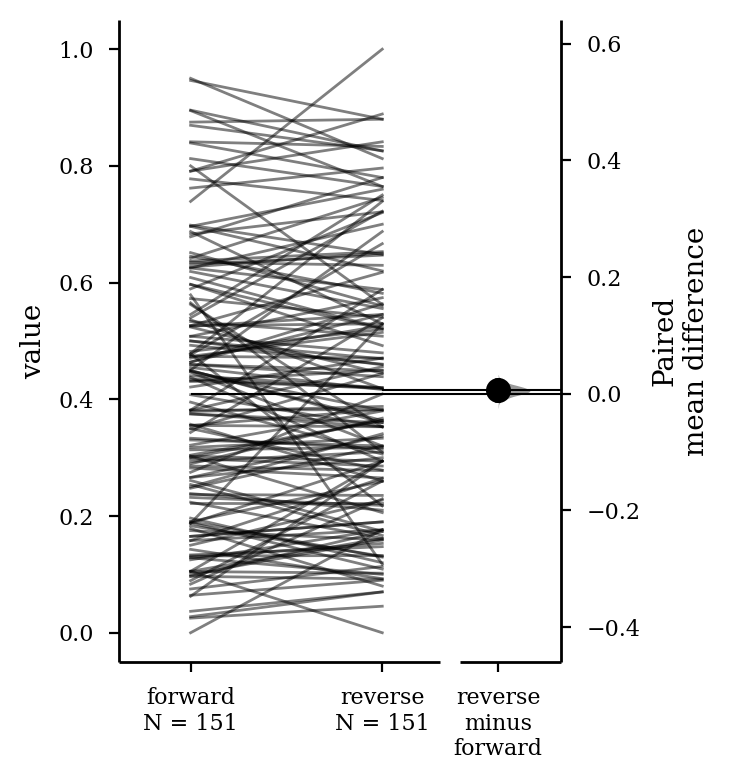

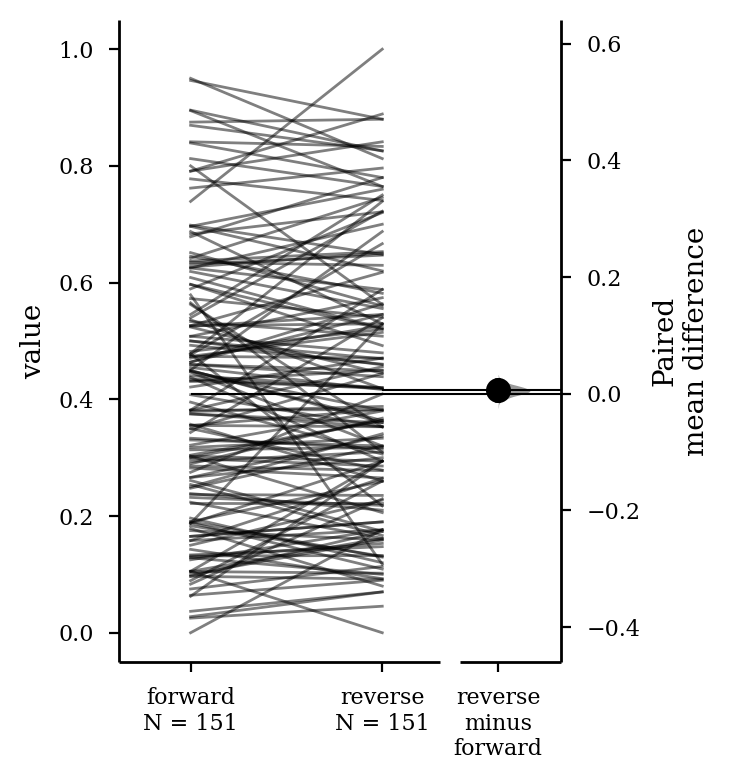

In [26]:
multi_2group_paired = dabest.load(temp_df[temp_df['deepSuperficial'] == "Superficial"], idx=("forward", "reverse"),
                                paired=True, id_col=("ID")
                                )
multi_2group_paired.mean_diff.plot()